In [1]:
import pyvisa
import scipy.io
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import time
from numpy import *
import numpy as np

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
rm = pyvisa.ResourceManager()
list_of_instrument = rm.list_resources()
for i in range(len(list_of_instrument)):
    my_instrument = rm.open_resource(list_of_instrument[i])
    try:
        listen = my_instrument.query('*IDN?')
        print(i, 'Found instrument at', list_of_instrument[i], '-> ', listen[:-2])
    except: pass

2 Found instrument at GPIB0::13::INSTR ->  Agilent Technologies,33510B,MY52200739,3.03-1.19-2.00-52-0
5 Found instrument at GPIB0::18::INSTR ->  ANRITSU,MS2830A,6200847105,4.09.01
11 Found instrument at GPIB0::26::INSTR ->  HEWLETT-PACKARD,33120A,0,7.0-5.0-1.
13 Found instrument at GPIB0::30::INSTR ->  Stanford_Research_Systems,SR844,s/n48867,ver1.00
18 Found instrument at TCPIP0::169.254.36.111::hislip0::INSTR ->  Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.4


# This might help to fine TCPIP connections

In [3]:
import pyvisa as visa
resources = visa.ResourceManager('@py')
resources.list_resources()

C:\Users\Demag\anaconda3\lib\site-packages\pyvisa_py\tcpip.py:121: UserWarning: TCPIP::hislip resource discovery requires the zeroconf package to be installed... try 'pip install zeroconf'
  warnings.warn(


('TCPIP::169.254.5.91::INSTR',
 'TCPIP::169.254.36.111::INSTR',
 'TCPIP::169.254.58.10::INSTR',
 'TCPIP::169.254.5.91::INSTR',
 'TCPIP::169.254.36.111::INSTR',
 'TCPIP::169.254.58.10::INSTR',
 'TCPIP::169.254.5.91::INSTR',
 'TCPIP::169.254.36.111::INSTR',
 'TCPIP::169.254.58.10::INSTR')

# In case you get timeout error, try to read raw data

In [61]:
# sr = sr.decode('ASCII')

sr = sr.split(',')

In [71]:
import pyvisa
rm = pyvisa.ResourceManager()


my_instrument = rm.open_resource('GPIB0::10::INSTR', query_delay=1.0)

sr = my_instrument.query('FSTR? 0')

# sr = my_instrument.read_raw()
float(sr)

0.0

In [62]:
sr[0]

'+6.2638670e-001'

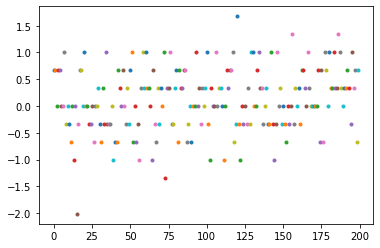

In [29]:
import pyvisa
import matplotlib.pyplot as plt
rm = pyvisa.ResourceManager()

my_instrument = rm.open_resource('GPIB0::30::INSTR')

# my_instrument.query('*IDN?')
for i in range(200):
    my_instrument.write('*CLS')
    my_instrument.write('OUTP?2')
    plt.plot(i, float(my_instrument.read_raw())*1e7, '.')

In [7]:
my_instrument.close()